## HW2 - Model Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la
from functools import partial


# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images with multiple flight strips

In [2]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2, tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=1000)

block = a.simulate_block()

In [3]:
len(block.images)

4

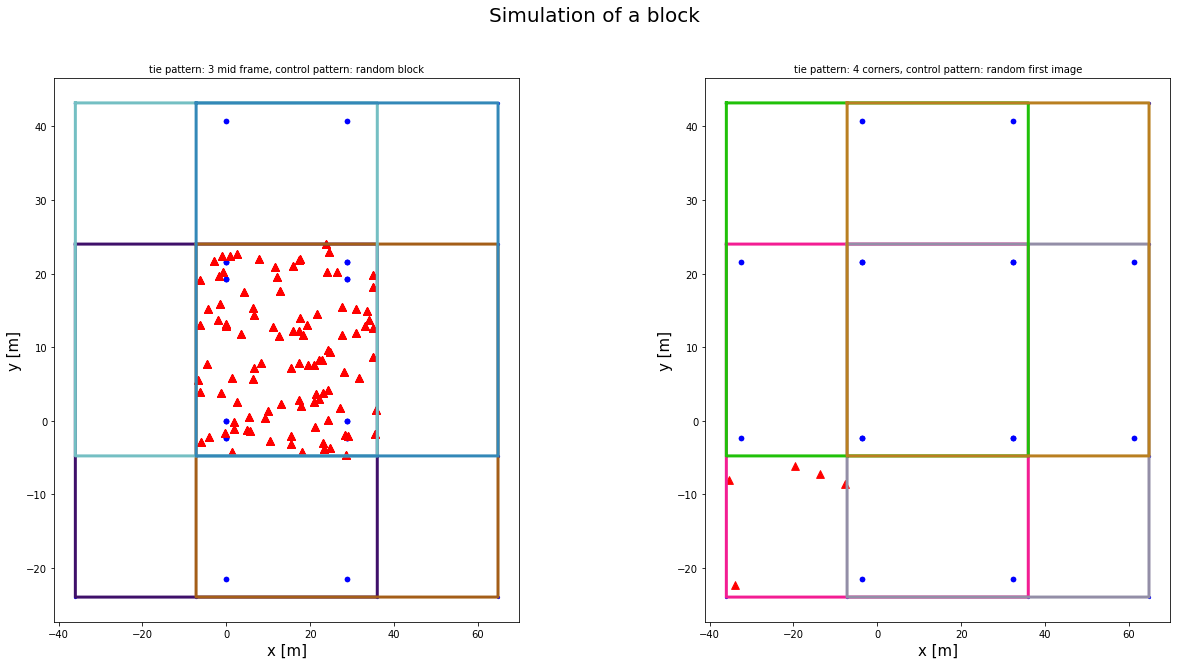

In [4]:
# define random seed
np.random.seed(0)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Simulation of a block', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=100, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[0])
# add title to the plot usimg the parameters of the simulation
axes[0].set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes[0].set_xlabel('x [m]', fontsize=15)
axes[0].set_ylabel('y [m]', fontsize=15)
# axes[0].axis('equal')

np.random.seed(0)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='4 corners', control_pattern='random first image', num_control_points=5, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[1])
axes[1].set_title('tie pattern: 4 corners, control pattern: random first image', fontsize=10)
axes[1].set_xlabel('x [m]', fontsize=15)
axes[1].set_ylabel('y [m]', fontsize=15)
# axes[1].axis('equal')

plt.show()
# fig.savefig('Simulation of a block.png')


## Calculate condition number of the block

<Axes: >

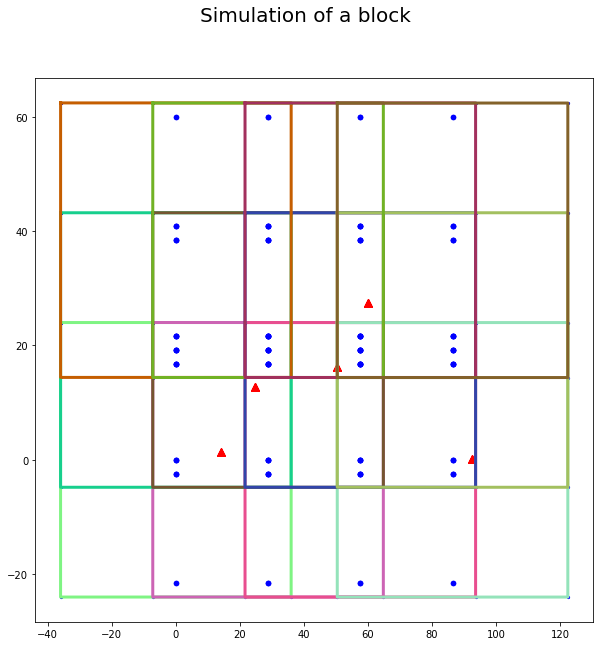

In [5]:
# define random seed
np.random.seed(0)
# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Simulation of a block', fontsize=20)
# simulate a block
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=4, num_strips=3,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
# plot the block
block.draw_block(ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

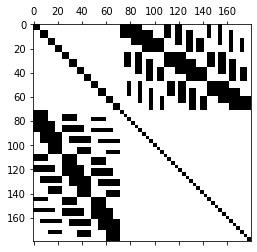

In [6]:
lb = block.create_lb_vector()
X = block.compute_variables_vector()
l0 = block.compute_observation_vector()
L = lb - l0
A = block.ComputeDesignMatrix()
N = np.dot(A.T, A)
plt.spy(N)
plt.show

In [7]:
# compute the eigenvalues of N
eigvals = la.eigvals(N)
# print(eigvals)
# compute the condition number of N
cond = np.max(eigvals)/np.min(eigvals)
cond

(741817490.5116329+0j)

In [8]:
SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
X,RMSE = block.BundleAdjustment(0.01,100,method = 'naive')

iteration:  1 
 condition number A:  27588.594184615762
 condition number N:  (761130538.190216+0j) 

 condition number N2:  761130484.2791814 

iteration:  2 
 condition number A:  27233.31991413638
 condition number N:  (741653703.965892+0j) 

 condition number N2:  741653707.0275176 

iteration:  3 
 condition number A:  27236.32690845739
 condition number N:  (741817494.3804541+0j) 

 condition number N2:  741817483.3280461 



In [9]:
# compute the covariance matrix
Cov = np.linalg.inv(N)
# compute the standard deviation of the observations
sigma_l = np.sqrt(np.diag(Cov))
# compute the standard deviation of the unknowns
sigma_X = np.sqrt(np.diag(Cov))
# compute the correlation matrix
corr = Cov / np.outer(sigma_l, sigma_l)

print('Observation standard deviation: \n', sigma_l)
print('Unknowns standard deviation: \n', sigma_X)
print('Correlation matrix: \n', corr)

Observation standard deviation: 
 [34.33417459 36.44467066  9.92355588  0.35905134  0.34285918  0.05118602
 18.5510061  32.00007816  4.91596688  0.31741283  0.18172519  0.02911667
 12.88857429 31.36827311  3.79730483  0.3108875   0.12202832  0.02439094
 32.33060512 35.96287364  8.12534099  0.35504559  0.31824497  0.04141086
 32.30147148 32.66440154 10.0515106   0.321284    0.32189115  0.04499445
 17.68668397 28.43269834  4.27247242  0.2826949   0.1734598   0.02544757
 11.14172572 27.44712203  3.41465437  0.27333502  0.10698797  0.02171412
 26.80718817 32.61146158  6.63618204  0.32164132  0.26421913  0.03683392
 36.29630721 39.01784923 13.92386801  0.38296789  0.35890688  0.05761662
 19.12279037 33.19535615  8.52853471  0.33054236  0.18478989  0.03498207
 14.49670288 32.74641435  8.00429898  0.32734437  0.13936781  0.03313758
 33.00620833 38.11245007 11.56496912  0.37693586  0.3254621   0.05349797
  2.8537415   3.42725384 14.79209199  1.82841525  1.60706945  8.27896041
  1.63309132  1.4